# Linear Regression with California Housing Dataset


## Introduction
Linear Regression is a fundamental algorithm in machine learning that models the relationship between a dependent variable and one or more independent variables. In this notebook, we'll apply linear regression to the California Housing dataset to predict the median house value (`MEDV`).


In [43]:

# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Loading the Dataset

In [4]:

# Load the California housing dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.DataFrame(california.target, columns=["MEDV"])


## Data Preprocessing

In [7]:

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Data Visualization

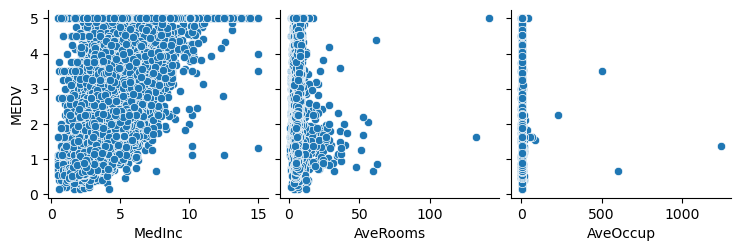

In [10]:

# Let's visualize the relationship between some of the features and the target variable.
sns.pairplot(X.join(y), x_vars=["MedInc", "AveRooms", "AveOccup"], y_vars="MEDV", kind="scatter")
plt.show()


## Model Creation and Training

In [13]:

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

## Model Performance

In [41]:

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display MSE and R^2 Score
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.5558915986952438
R^2 Score: 0.5757877060324512


## Visualization of Predictions

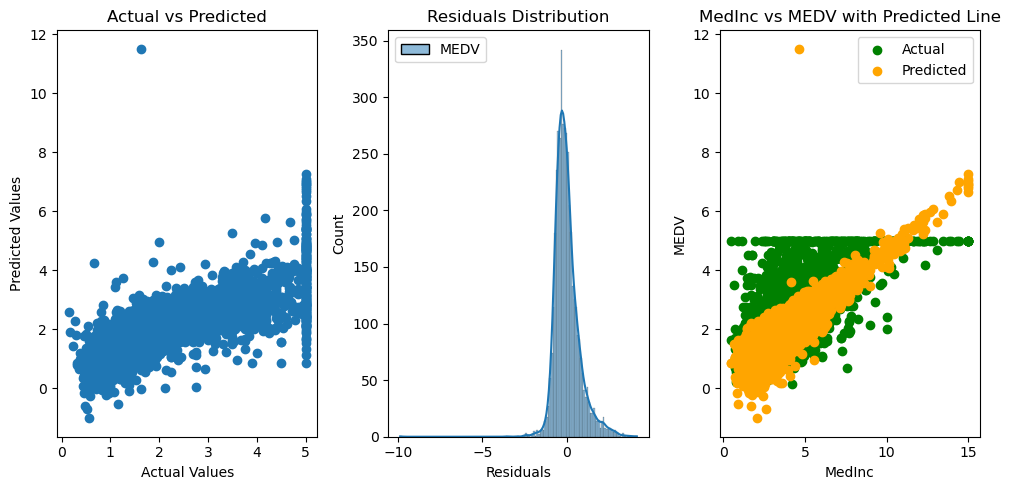

In [31]:

plt.figure(figsize=(10, 5))

# Scatter plot for predictions vs actual values
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")

# Residuals plot
plt.subplot(1, 3, 2)
sns.histplot(y_test - y_pred, kde=True)
plt.xlabel("Residuals")
plt.title("Residuals Distribution")

# Plotting the model's predicted line for MedInc vs MEDV
plt.subplot(1, 3, 3)
plt.scatter(X_test['MedInc'], y_test, color='green', label="Actual")
plt.scatter(X_test['MedInc'], y_pred, color='orange', label="Predicted")
plt.xlabel("MedInc")
plt.ylabel("MEDV")
plt.title("MedInc vs MEDV with Predicted Line")
plt.legend()

plt.tight_layout()
plt.show()
